In [12]:
import matplotlib.pyplot as plt
import numpy as np
import ee
import pandas as pd
from scipy.misc import imsave
ee.Initialize()

In [13]:
# Helpers

def df_from_ee_object(imcol):
    df = pd.DataFrame(imcol, columns = imcol[0])
    df = df[1:]
    return(df)

def array_from_df(df, variable):
    
    # get data from df as arrays
    lons = np.array(df.longitude)
    lats = np.array(df.latitude)
    data = np.array(df[variable]) # Set var here 
                                              
    # get the unique coordinates
    uniqueLats = np.unique(lats)
    uniqueLons = np.unique(lons)

    # get number of columns and rows from coordinates
    ncols = len(uniqueLons)    
    nrows = len(uniqueLats)

    # determine pixelsizes
    ys = uniqueLats[1] - uniqueLats[0] 
    xs = uniqueLons[1] - uniqueLons[0]

    # create an array with dimensions of image
    arr = np.zeros([nrows, ncols], np.float32)

    # fill the array with values
    counter =0
    for y in range(0,len(arr),1):
        for x in range(0,len(arr[0]),1):
            if lats[counter] == uniqueLats[y] and lons[counter] == uniqueLons[x] and counter < len(lats)-1:
                counter+=1
                arr[len(uniqueLats)-1-y,x] = data[counter] # we start from lower left corner
    
    return arr

In [39]:
# Init params
landsat = ee.ImageCollection("LANDSAT/LC8_L1T_8DAY_NDVI")
years = [x for x in range(2013, 2017)]
area = (ee.FeatureCollection('ft:1Lhpvhw2Xea1VpyTQdKXM5K8uVcxKXT3OjCtmfXAi').filter(ee.Filter().eq('COUNTY num', 199)))

In [15]:
# # # Optionally define an area by specifying a polygon
# area = ee.Geometry.Polygon(
#          [[[-98.51749420166016, 37.921722001139806],
#            [-98.5202407836914, 37.790794553924435],
#            [-98.31047058105469, 37.790794553924414],
#            [-98.3060073852539, 37.92009699991215]]])

In [16]:
def main(year,product, area):
    # Set date in ee date format
    startdate = ee.Date.fromYMD(year,1,1)
    enddate = ee.Date.fromYMD(year+1,12,31)
    
    years = range(year, year+1)
    
    months = range(7,8)
    
    # Filter
    filtered = product.filterDate(startdate, enddate).sort('system:time_start', False).select("NDVI")

    # calculate the monthly mean
    def calcMonthlyMean(imageCollection):
        mylist = ee.List([])
        for y in years:
            for m in months:
                w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).mean();
                mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)).set('system:time_start',ee.Date.fromYMD(y,m,1)))
        return ee.ImageCollection.fromImages(mylist)

    # run the calcMonthlyMean function
    monthly = ee.ImageCollection(calcMonthlyMean(filtered))

    # select the region of interest, 30 is the cellsize in meters
    monthly = monthly.getRegion(area,30,"epsg:4326").getInfo()
    
    # Make it an array
    df = df_from_ee_object(monthly)
    arr = array_from_df(df, "NDVI")
    
    return arr


In [17]:
analysis_year=2013
t = main(analysis_year, landsat, area)



EEException: ImageCollection.getRegion: Too many values: 3384431 points x 1 bands x 1 images > 1048576.

In [ ]:
imsave()

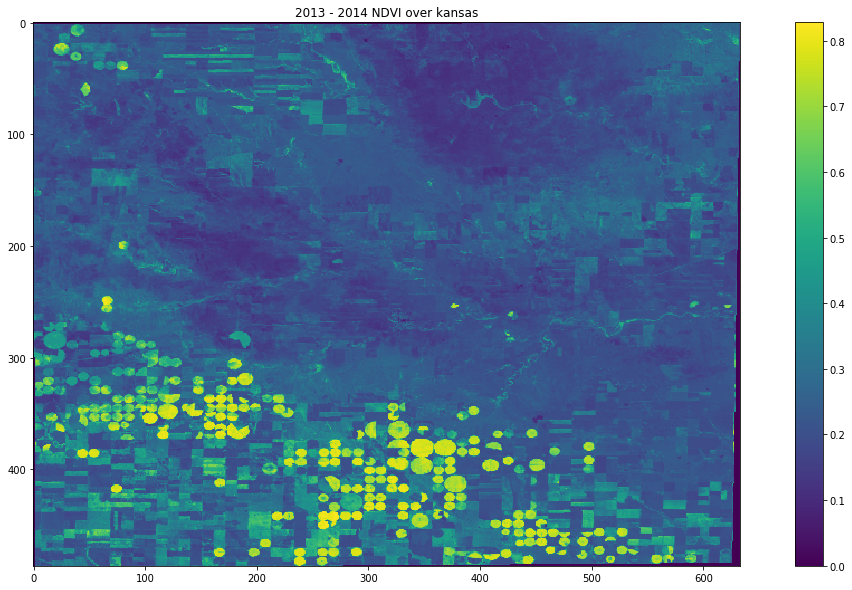

In [15]:
plt.figure(figsize=(20, 10))
plt.imshow(t)
plt.colorbar()
plt.title("{} - {} NDVI over kansas".format(str(analysis_year), str(analysis_year+1)))
plt.show()

# Kansas

In [18]:
results = []
for y in years:
    results.append(main(y,landsat, area))

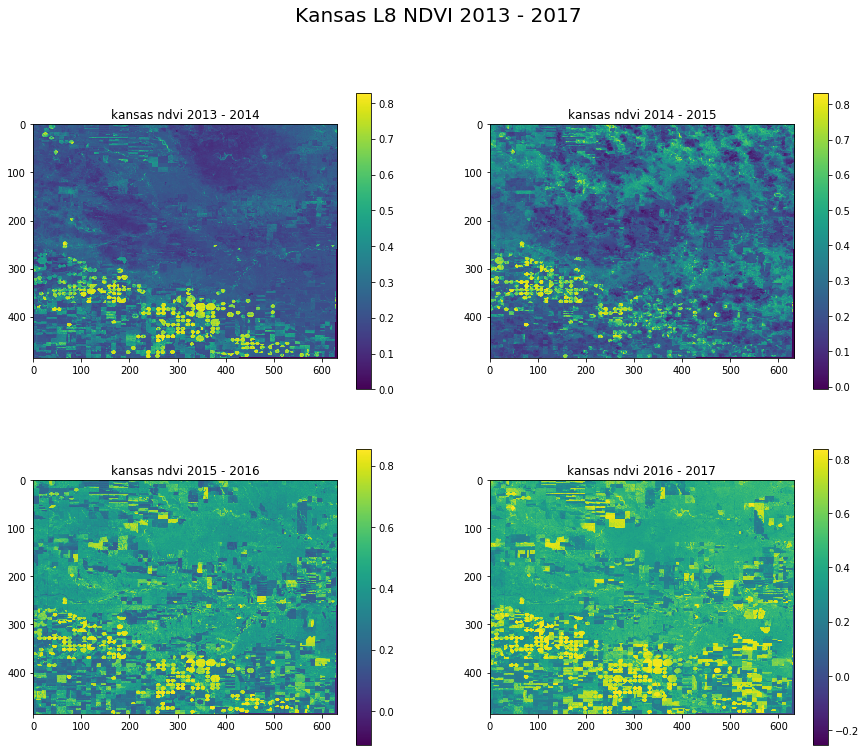

In [17]:
plt.figure(figsize=(15, 12))

plt.suptitle("Kansas L8 NDVI 2013 - 2017", size = 20)

plt.subplot(2,2,1)
plt.imshow(results[0])
plt.title("kansas ndvi 2013 - 2014")
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(results[1])
plt.title("kansas ndvi 2014 - 2015")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(results[2])
plt.title("kansas ndvi 2015 - 2016")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(results[3])
plt.title("kansas ndvi 2016 - 2017")
plt.colorbar()

plt.show()

# Random

In [44]:
random = ee.Geometry.Polygon(
         [[[-79.51749420166016, 39.921722001139806],
            [-79.5202407836914, 39.790794553924435],
            [-79.31047058105469, 39.790794553924414],
            [-79.3060073852539, 39.92009699991215]]])

In [45]:
rand_results = []

for y in years:
    rand_results.append(main(y,landsat, random))

In [46]:
imsave('rand_2013.png', rand_results[0])
imsave('rand_2014.png', rand_results[1])
imsave('rand_2015.png', rand_results[2])
imsave('rand_2016.png', rand_results[3])

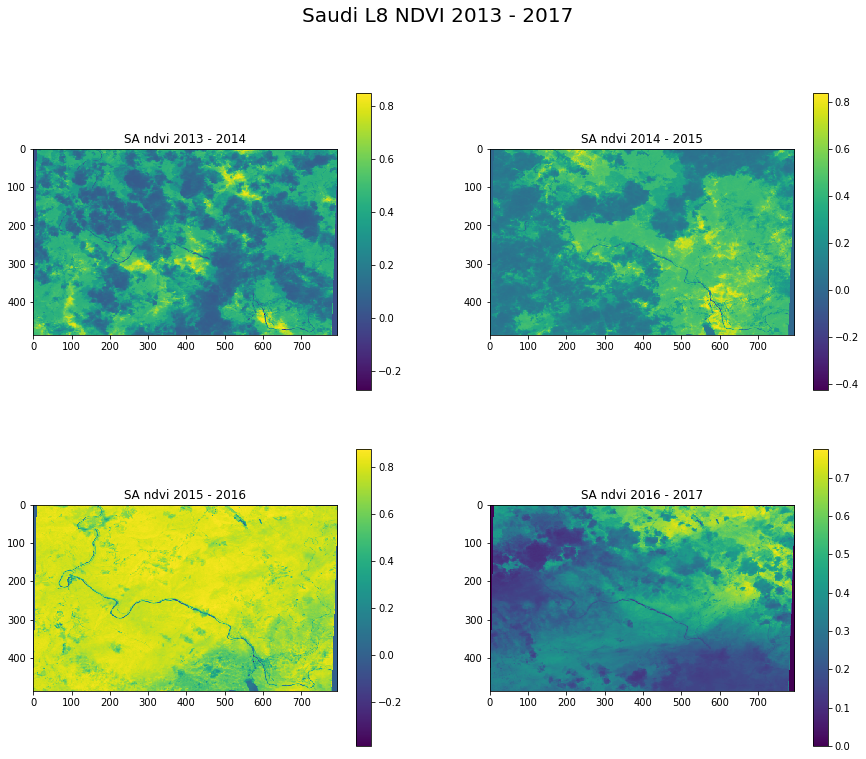

In [47]:
plt.figure(figsize=(15, 12))

plt.suptitle("Saudi L8 NDVI 2013 - 2017", size = 20)

plt.subplot(2,2,1)
plt.imshow(rand_results[0])
plt.title("SA ndvi 2013 - 2014")
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(rand_results[1])
plt.title("SA ndvi 2014 - 2015")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(rand_results[2])
plt.title("SA ndvi 2015 - 2016")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(rand_results[3])
plt.title("SA ndvi 2016 - 2017")
plt.colorbar()

plt.show()

# Saudi

In [20]:
saudi = ee.Geometry.Polygon(
        [[[38.40545654296875, 30.477082932837682],
          [38.393096923828125, 30.26618407355883],
          [38.623809814453125, 30.256694798480346],
          [38.6114501953125, 30.472348632640834]]]);

In [21]:
saudi_results = []

for y in years:
    saudi_results.append(main(y,landsat, saudi))
    

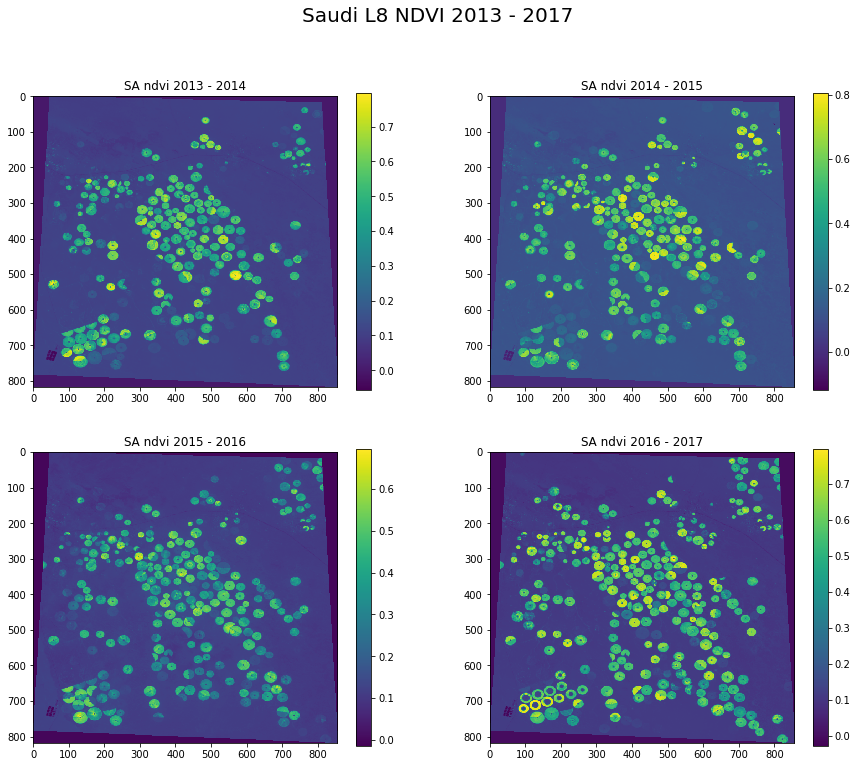

In [22]:
plt.figure(figsize=(15, 12))

plt.suptitle("Saudi L8 NDVI 2013 - 2017", size = 20)

plt.subplot(2,2,1)
plt.imshow(saudi_results[0])
plt.title("SA ndvi 2013 - 2014")
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(saudi_results[1])
plt.title("SA ndvi 2014 - 2015")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(saudi_results[2])
plt.title("SA ndvi 2015 - 2016")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(saudi_results[3])
plt.title("SA ndvi 2016 - 2017")
plt.colorbar()

plt.show()

# Australia

In [23]:
aust = ee.Geometry.Polygon(
        [[[146.21360778808594, -35.889884507550576],
          [146.2451934814453, -35.98217354161431],
          [146.5737533569336, -35.94743881203682],
          [146.49856567382812, -35.862065496432024]]]);

In [24]:
aust_results = []

for y in years:
    aust_results.append(main(y,landsat, aust))
    


In [32]:
imsave('aust_2013_30.png', aust_results[0])
imsave('aust_2014_30.png', aust_results[1])
imsave('aust_2015_30.png', aust_results[2])
imsave('aust_2016_30.png', aust_results[3])

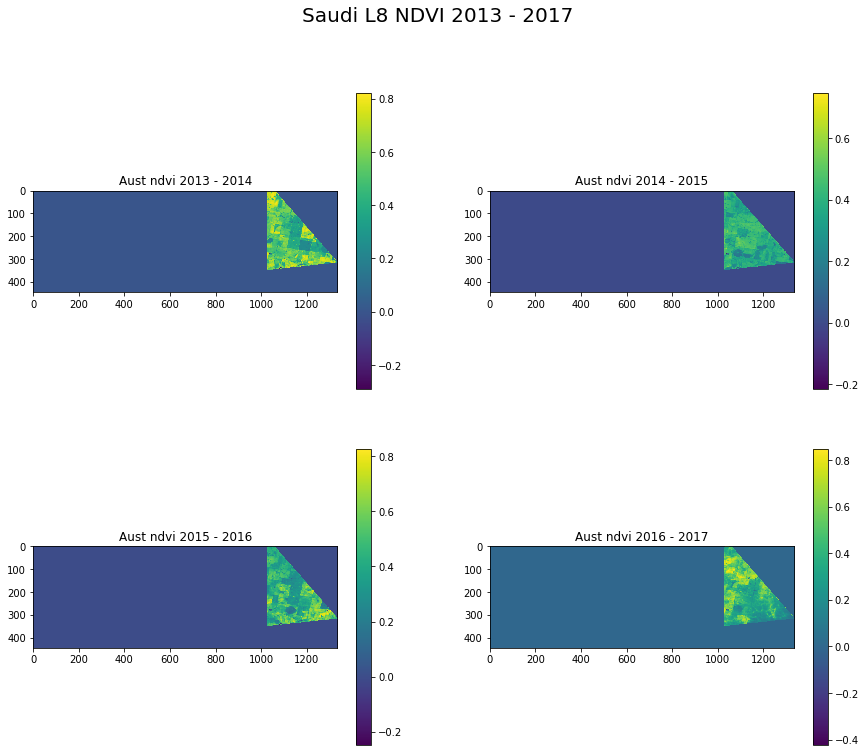

In [25]:
plt.figure(figsize=(15, 12))

plt.suptitle("Australia L8 NDVI 2013 - 2017", size = 20)

plt.subplot(2,2,1)
plt.imshow(aust_results[0])
plt.title("Aust ndvi 2013 - 2014")
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(aust_results[1])
plt.title("Aust ndvi 2014 - 2015")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(aust_results[2])
plt.title("Aust ndvi 2015 - 2016")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(aust_results[3])
plt.title("Aust ndvi 2016 - 2017")
plt.colorbar()

plt.show()

# California

In [28]:
cali = ee.Geometry.Polygon(
        [[[-119.99198913574219, 36.63701909682385],
          [-119.98306274414062, 36.47872381162464],
          [-119.61433410644531, 36.47265029399174],
          [-119.6630859375, 36.65795373431161]]]);

In [29]:
ca_results = []

for y in years:
    ca_results.append(main(y,landsat, cali))
    

In [31]:
imsave('ca_2013_30.png', ca_results[0])
imsave('ca_2014_30.png', ca_results[1])
imsave('ca_2015_30.png', ca_results[2])
imsave('ca_2016_30.png', ca_results[3])

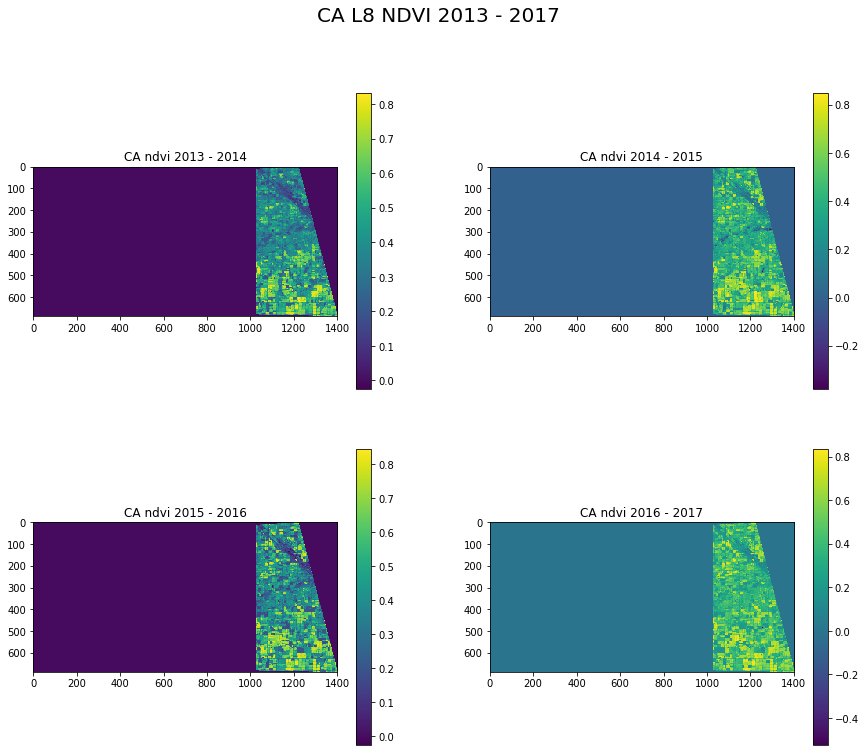

In [30]:
plt.figure(figsize=(15, 12))

plt.suptitle("CA L8 NDVI 2013 - 2017", size = 20)

plt.subplot(2,2,1)
plt.imshow(ca_results[0])
plt.title("CA ndvi 2013 - 2014")
plt.colorbar()

plt.subplot(2,2,2)
plt.imshow(ca_results[1])
plt.title("CA ndvi 2014 - 2015")
plt.colorbar()

plt.subplot(2,2,3)
plt.imshow(ca_results[2])
plt.title("CA ndvi 2015 - 2016")
plt.colorbar()

plt.subplot(2,2,4)
plt.imshow(ca_results[3])
plt.title("CA ndvi 2016 - 2017")
plt.colorbar()

plt.show()

# Retrieve landsat 5

In [18]:
def l5_main(year,product, area):
    # Set date in ee date format
    startdate = ee.Date.fromYMD(year,1,1)
    enddate = ee.Date.fromYMD(year+1,12,31)
    
    years = range(year, year+1)
    months = range(7,8)
    
    # Filter
    filtered = product.filterDate(startdate, enddate).select("NDVI")

    # calculate the monthly mean
    def calcMean(imageCollection):
        mylist = ee.List([])
        for y in years:
            for m in months:
                w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).mean();
                mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)))
        return ee.ImageCollection.fromImages(mylist)

    # run the calcMonthlyMean function
    monthly = ee.ImageCollection(calcMean(filtered))
    return monthly
    # select the region of interest, 30 is the cellsize in meters
    monthly = monthly.getRegion(area,30,"epsg:4326").getInfo() #100
    
    # Make it an array
    df = df_from_ee_object(monthly)
    arr = array_from_df(df, "NDVI")
    
    return arr


In [19]:
def l5_main(year,product, area):
    # Set date in ee date format
    startdate = ee.Date.fromYMD(year,1,1)
    enddate = ee.Date.fromYMD(year+1,12,31)
    
    years = range(year, year+1)
    months = range(7,8)
    
    # Filter
    filtered = product.filterDate(startdate, enddate).select("NDVI")

    # calculate the monthly mean
    def calcMean(imageCollection):
        mylist = ee.List([])
        for y in years:
            for m in months:
                w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).mean();
                mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)))
        return ee.ImageCollection.fromImages(mylist)

    # run the calcMonthlyMean function
    monthly = ee.ImageCollection(calcMean(filtered))
    # select the region of interest, 30 is the cellsize in meters
    roi = monthly.getRegion(area,30,"epsg:4326").getInfo() #50
    
    # Make it an array
    df = df_from_ee_object(roi)
    arr = array_from_df(df, "NDVI")
    
    return arr


In [21]:
saudi = []

print(area)
area = (ee.FeatureCollection('ft:1Lhpvhw2Xea1VpyTQdKXM5K8uVcxKXT3OjCtmfXAi').filter(ee.Filter().eq('COUNTY num', 198)))

l5 = ee.ImageCollection("LANDSAT/LT5_L1T_32DAY_NDVI")

#l5 = ee.ImageCollection("LANDSAT/LT5_L1T_8DAY_NDVI")

l5_years = [x for x in range(1985, 2012)]

for i in l5_years:
    saudi.append(l5_main(i,l5,area))

ee.FeatureCollection({
  "type": "Invocation", 
  "arguments": {
    "filter": {
      "type": "Invocation", 
      "arguments": {
        "leftField": "COUNTY num", 
        "rightValue": 199
      }, 
      "functionName": "Filter.equals"
    }, 
    "collection": {
      "type": "Invocation", 
      "arguments": {
        "tableId": "ft:1Lhpvhw2Xea1VpyTQdKXM5K8uVcxKXT3OjCtmfXAi"
      }, 
      "functionName": "Collection.loadTable"
    }
  }, 
  "functionName": "Collection.filter"
})


IndexError: index 1 is out of bounds for axis 0 with size 0

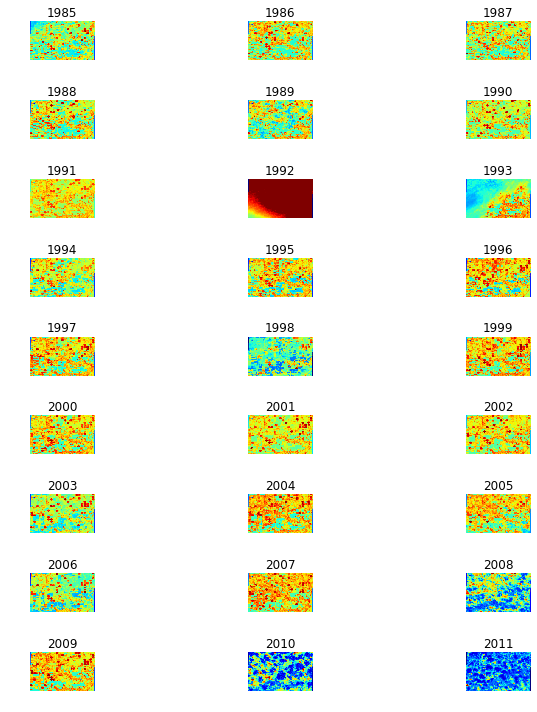

In [245]:
# Subplots are organized in a Rows x Cols Grid
# Tot and Cols are known

Tot = len(saudi)
Cols = 3

# Compute Rows required
Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index

Position = range(1,Tot + 1)

fig = plt.figure(figsize=(10, 10))
for k in range(Tot):

    ax = fig.add_subplot(Rows,Cols,Position[k])
    ax.imshow(saudi[k])
    ax.axis('off')
    ax.set_title(l5_years[k])

plt.tight_layout()
plt.show()

In [246]:
aust = ee.Geometry.Polygon(
        [[[146.21360778808594, -35.889884507550576],
          [146.2451934814453, -35.98217354161431],
          [146.5737533569336, -35.94743881203682],
          [146.49856567382812, -35.862065496432024]]]);

In [247]:
aust_results = []
l5 = ee.ImageCollection("LANDSAT/LT5_L1T_32DAY_NDVI")

#l5 = ee.ImageCollection("LANDSAT/LT5_L1T_8DAY_NDVI")

l5_years = [x for x in range(1985, 2012)]

for i in l5_years:
    aust_results.append(l5_main(i,l5,aust))

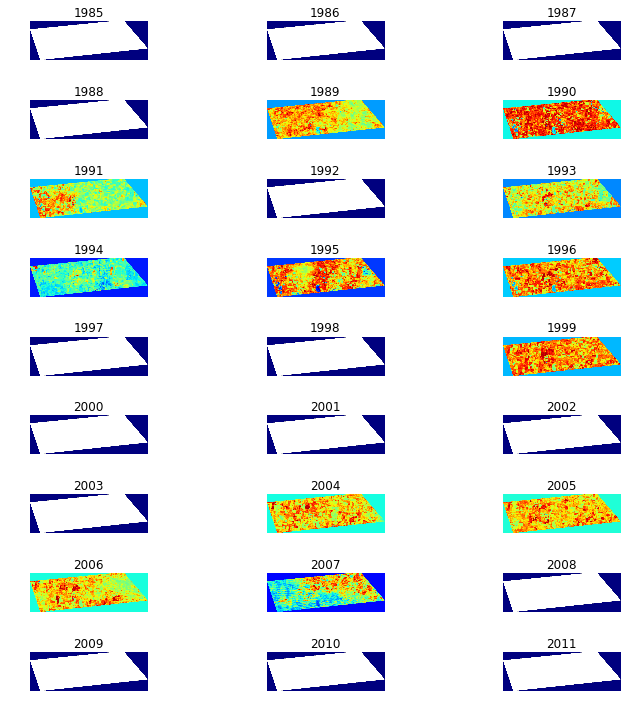

In [248]:
# Subplots are organized in a Rows x Cols Grid

Tot = len(aust_results)
Cols = 3

# Compute Rows required
Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index

Position = range(1,Tot + 1)

fig = plt.figure(figsize=(10, 10))
for k in range(Tot):

    ax = fig.add_subplot(Rows,Cols,Position[k])
    ax.imshow(aust_results[k])
    ax.axis('off')
    ax.set_title(l5_years[k])

plt.tight_layout()
plt.show()

In [249]:
cali = ee.Geometry.Polygon(
        [[[-119.99198913574219, 36.63701909682385],
          [-119.98306274414062, 36.47872381162464],
          [-119.61433410644531, 36.47265029399174],
          [-119.6630859375, 36.65795373431161]]]);

In [250]:
ca_results = []
l5 = ee.ImageCollection("LANDSAT/LT5_L1T_32DAY_NDVI")

#l5 = ee.ImageCollection("LANDSAT/LT5_L1T_8DAY_NDVI")

l5_years = [x for x in range(1985, 2012)]

for i in l5_years:
    ca_results.append(l5_main(i,l5,cali))

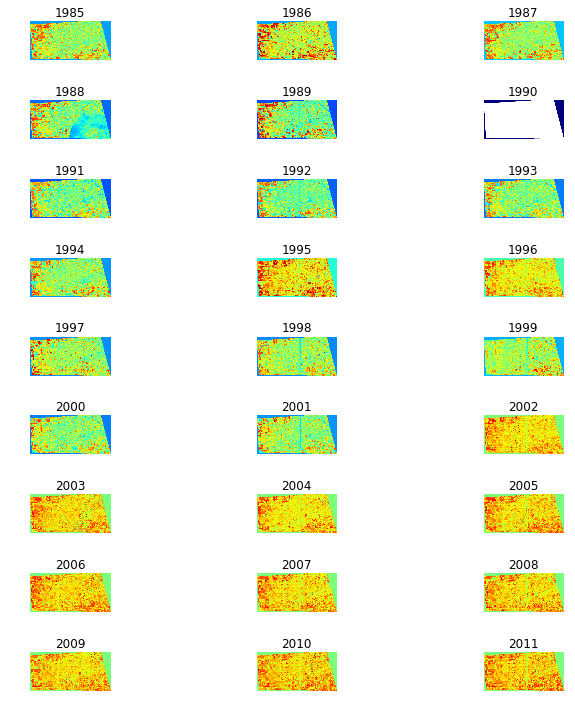

In [254]:
# Subplots are organized in a Rows x Cols Grid

Tot = len(aust_results)
Cols = 3

# Compute Rows required
Rows = Tot // Cols 
Rows += Tot % Cols

# Create a Position index

Position = range(1,Tot + 1)

fig = plt.figure(figsize=(10, 10))
for k in range(Tot):

    ax = fig.add_subplot(Rows,Cols,Position[k])
    ax.imshow(ca_results[k])
    ax.axis('off')
    ax.set_title(l5_years[k])

plt.tight_layout()
plt.show()